# Random Forest and Boosting Lab

In this lab we will practice using Random Forest Regressor and Boosted Trees Regressor on the Project 6 Data.


## 1. Load and inspect the data

As part of your work of project 6 you should have retrieved the top 250 movies from IMDB. Conduct this lab on the data you have retrieved.

In the [asset folder](../../assets/datasets/imdb_p6_sample.csv) you can find a subset of the movies, in case you have not completed yet Project 6.

1. Load the dataset and inspect it
- Assign the rating to a y vector and the binary columns to an X feature matrix
- What would you do with the year variable?
> Answer: normalize it and use it as feature

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree, ensemble, cross_validation, metrics, linear_model, grid_search

In [2]:
df = pd.read_csv('../../assets/datasets/imdb_p6_sample.csv')
df.head()

,HA,rating,tconst,title,year,excellent,great,love,beautiful,best,hope,groundbreaking,amazing
0,1633889,9.3,tt0111161,The Shawshank Redemption,1994,0,1,0,1,0,0,0,1
1,1118799,9.2,tt0068646,The Godfather,1972,1,1,0,0,1,0,1,0
2,762879,9.0,tt0071562,The Godfather: Part II,1974,1,1,0,0,1,0,0,1
3,1616346,9.0,tt0468569,The Dark Knight,2008,1,1,1,0,1,0,1,1
4,835155,8.9,tt0108052,Schindler's List,1993,1,1,1,1,1,1,1,1


In [3]:
X = df[[col for col in df.columns if col not in ['HA', 'rating', 'tconst', 'title', 'year']]]
y = df['rating']

## 2. Decision Tree Regressor


1. Train a decision tree regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
    - They should align to a diagonal line.
- Add some text to the plot indicating the average $R^2$ coefficient

In [4]:
cv = cross_validation.KFold(len(df), shuffle=True, n_folds=3)

In [5]:
estimator = tree.DecisionTreeRegressor()

In [6]:
scores = cross_validation.cross_val_score(estimator, X, y, cv=cv)
print scores
print np.mean(scores)

[-0.58967391 -1.875      -6.15789474]
-2.87418954996


In [7]:
y_pred = cross_validation.cross_val_predict(estimator, X, y, cv=cv)

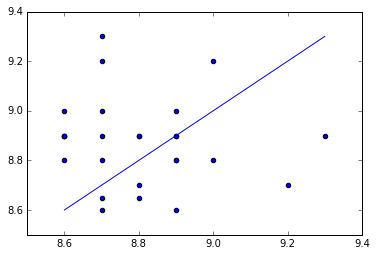

In [8]:
plt.scatter(y, y_pred)
plt.plot(y, y)

## 3. Random Forest Regressor


1. Train a random forest regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- How does this plot compare with the previous one?
> Answer: points are tighter now, indicating a better fit

In [9]:
estimator = ensemble.RandomForestRegressor()

In [10]:
scores = cross_validation.cross_val_score(estimator, X, y, cv=cv)
print scores
print np.mean(scores)

[-0.45642853 -0.6625     -7.0272117 ]
-2.71538007617


In [11]:
y_pred = cross_validation.cross_val_predict(estimator, X, y, cv=cv)

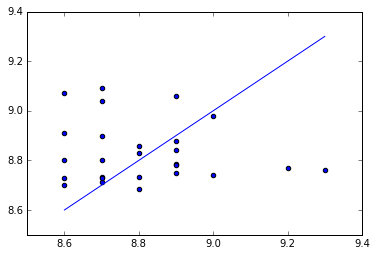

In [12]:
plt.scatter(y, y_pred)
plt.plot(y, y)

## 4. AdaBoost Regressor


1. Train a AdaBoost regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [13]:
estimator = ensemble.AdaBoostRegressor()

In [14]:
scores = cross_validation.cross_val_score(estimator, X, y, cv=cv)
print scores
print np.mean(scores)

[-0.5        -0.2820216  -8.74269006]
-3.17490388781


In [15]:
y_pred = cross_validation.cross_val_predict(estimator, X, y, cv=cv)

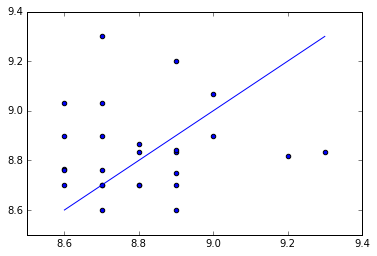

In [16]:
plt.scatter(y, y_pred)
plt.plot(y, y)

## 4. Gradient Boosting Trees Regressor


1. Train a Gradient Boosting Trees regressor on the data and estimate the rating
- Evaluate the score with a 3-fold shuffled cross validation
- Do a scatter plot of the predicted vs actual scores for each of the 3 folds, do they match?
- Compare with previous score

In [17]:
estimator = ensemble.GradientBoostingRegressor()

In [18]:
scores = cross_validation.cross_val_score(estimator, X, y, cv=cv)
print scores
print np.mean(scores)

[-0.87767252 -0.53259191 -9.371455  ]
-3.59390647692


In [19]:
y_pred = cross_validation.cross_val_predict(estimator, X, y, cv=cv)

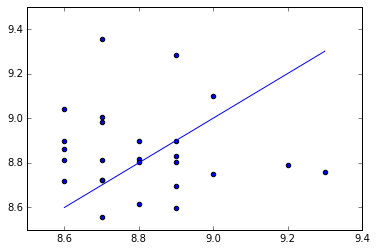

In [20]:
plt.scatter(y, y_pred)
plt.plot(y, y)

## 5. Tableau Practice

Practice using Tableau to inspect the data and also to plot the results.


## Bonus

Take the best model and try to improve it using grid search.